# Лабораторная работа 4

> =========================================
>
> Тема: Плотные нейронные сети
>
> Набор данных: Рак
>
> Студент: Шацкий Никита ИУ7-21М
> 
>=========================================

## 0. Импорты

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## 1. Данные

### 1.1. Чтение

In [6]:
pd.set_option('display.max_columns', None)

dfInit = pd.read_csv('./data/cancers.csv', delimiter=';', encoding='utf8')

df = dfInit.copy(deep=True)

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,14154.00,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,15646.00,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,45438.00,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,45408.00,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,45459.00,45532.00,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,45463.00,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 1.2. Преобразование

In [7]:
def updateData(fieldName):
  dataDf = list(set(df[fieldName].map(lambda elem: elem)))

  cnt = 0
  dataDict = {}
  for shape in dataDf:
    if shape not in dataDict.keys():
      dataDict[shape] = cnt
      cnt += 1
  print(f"{fieldName} = {dataDict}\n")

  df[fieldName] = df[fieldName].map(lambda elem: dataDict[elem])

In [8]:
del df["id"]
df.dropna(axis=0, inplace=True)
updateData(fieldName="diagnosis")
updateData(fieldName="radius_mean")
updateData(fieldName="texture_mean")
updateData(fieldName="perimeter_mean")
updateData(fieldName="area_mean")
updateData(fieldName="smoothness_mean")
updateData(fieldName="compactness_mean")
updateData(fieldName="concavity_mean")
updateData(fieldName="concave points_mean")
updateData(fieldName="symmetry_mean")
updateData(fieldName="fractal_dimension_mean")
updateData(fieldName="radius_se")
updateData(fieldName="texture_se")
updateData(fieldName="perimeter_se")
updateData(fieldName="area_se")
updateData(fieldName="smoothness_se")
updateData(fieldName="compactness_se")
updateData(fieldName="concavity_se")
updateData(fieldName="concave points_se")
updateData(fieldName="symmetry_se")
updateData(fieldName="fractal_dimension_se")
updateData(fieldName="radius_worst")
updateData(fieldName="texture_worst")
updateData(fieldName="perimeter_worst")
updateData(fieldName="area_worst")
updateData(fieldName="smoothness_worst")
updateData(fieldName="compactness_worst")
updateData(fieldName="concavity_worst")
updateData(fieldName="concave points_worst")
updateData(fieldName="symmetry_worst")
updateData(fieldName="fractal_dimension_worst")

df


diagnosis = {'M': 0, 'B': 1}

radius_mean = {43009.0: 0, 6.981: 1, 7.729: 2, 8.196: 3, 9.504: 4, 8.618: 5, 8.598: 6, 8.888: 7, 13.34: 8, 13.53: 9, 13.73: 10, 14.54: 11, 14.68: 12, 13.71: 13, 13.0: 14, 15.78: 15, 15.85: 16, 17.99: 17, 18.25: 18, 19.69: 19, 20.57: 20, 20.29: 21, 19.17: 22, 19.81: 23, 21.16: 24, 25.22: 25, 22.27: 26, 24.25: 27, 27.22: 28, 25.73: 29, 27.42: 30, 32813.0: 31, 9.738: 32, 9.0: 33, 9.268: 34, 22586.0: 35, 12.0: 36, 13.75: 37, 14.25: 38, 12359.0: 39, 32843.0: 40, 15.75: 41, 15.0: 42, 16.78: 43, 16.25: 44, 17.47: 45, 17.75: 46, 18.22: 47, 34912.0: 48, 19.0: 49, 19.53: 50, 20.47: 51, 21.75: 52, 28825.0: 53, 34973.0: 54, 8.726: 55, 8.571: 56, 9.333: 57, 35004.0: 58, 13.44: 59, 13.69: 60, 13.47: 61, 13.94: 62, 14.44: 63, 14.97: 64, 14.22: 65, 14.19: 66, 14.69: 67, 15.19: 68, 45261.0: 69, 24777.0: 70, 14.47: 71, 15.22: 72, 35034.0: 73, 24807.0: 74, 14580.0: 75, 45303.0: 76, 45304.0: 77, 45306.0: 78, 45308.0: 79, 45309.0: 80, 45310.0: 81, 45312.0: 82, 45313.0: 83, 309

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17,423,508,447,328,239,252,0,325,455,145,269,8,131,520,141,89,208,0,206,18,3,129,541,259,261,0,221,166,0
1,0,20,4,91,509,456,515,19,500,201,239,65,398,267,68,385,274,433,79,15,84,17,10,106,536,340,87,516,27,313,209
2,0,19,9,89,482,284,305,523,341,393,8,272,162,4,88,78,270,175,101,12,342,16,11,103,516,370,457,170,317,35,8
3,0,301,7,29,104,432,506,253,26,188,142,185,144,268,23,182,482,507,388,314,478,7,162,45,201,205,63,204,342,381,501
4,0,21,1,93,502,86,261,315,372,63,278,464,65,5,89,403,527,240,217,214,5,15,2,101,495,217,473,329,210,167,358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,419,315,325,518,123,78,6,266,400,372,98,397,507,137,24,135,318,502,409,482,251,145,367,543,59,201,400,238,272,378
565,0,133,60,313,495,308,183,457,173,417,187,13,124,491,439,56,431,343,120,3,474,124,96,356,518,390,182,323,398,486,513
566,0,151,178,496,416,414,244,97,505,99,201,401,80,307,399,8,156,54,320,373,261,243,452,510,435,362,528,118,421,209,113
567,0,153,326,324,497,50,470,471,456,426,247,21,168,173,249,326,436,292,135,265,335,347,366,129,527,44,225,127,194,417,33


## 2. Выполнение

### 2.1. Разделение на обучающие и тестовые данные


In [9]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

xTraining, xTest, yTraining, yTest = train_test_split(x, y, test_size = 0.3, random_state=42)

In [10]:
scaler = StandardScaler()
scaler.fit(xTraining)
xTrainingTransf = scaler.transform(xTraining)
xTestTransf = scaler.transform(xTest)

### 2.2. Многослойный перцептрон

In [11]:
def calculateAccuracy(mlpcClf: MLPClassifier):
    mlpcClf.fit(xTrainingTransf, yTraining)
    return mlpcClf.score(xTestTransf, yTest)

### 2.3. Количество нейронов на 1 уровне

In [12]:
hiddenLayerSizeArr = [(60,), (100,), (150,), (200,), (250,), (350,), (500,), (750,), (1000,)]

# activation=relu, solver=lbfgs, max_iter=200

for layerSize in hiddenLayerSizeArr:
    mlpcClf = MLPClassifier(
        solver='lbfgs',
        hidden_layer_sizes=layerSize, 
        early_stopping=True,
        random_state=42
    )
    
    print('layerSize={0}, accuracy={1}'.format(layerSize, calculateAccuracy(mlpcClf)))

layerSize=(60,), accuracy=0.847953216374269
layerSize=(100,), accuracy=0.8654970760233918
layerSize=(150,), accuracy=0.8596491228070176
layerSize=(200,), accuracy=0.8421052631578947
layerSize=(250,), accuracy=0.847953216374269
layerSize=(350,), accuracy=0.8538011695906432
layerSize=(500,), accuracy=0.847953216374269
layerSize=(750,), accuracy=0.8654970760233918
layerSize=(1000,), accuracy=0.8596491228070176


### 2.4. Оптимизатор

In [13]:
solverArr = ['lbfgs', 'sgd', 'adam']

# activation=relu, max_iter=200
# 'lbfgs' -- для маленьких датасетов
# 'sgd' -- стохастический градиентный спуск
# 'adam' -- для больших датасетов

for solver in solverArr:
    mlpcClf = MLPClassifier(
        solver=solver,
        hidden_layer_sizes=(150,),
        early_stopping=True,
        random_state=42
    )
    
    print('solver={0}, accuracy={1}'.format(solver, calculateAccuracy(mlpcClf)))

solver=lbfgs, accuracy=0.8596491228070176
solver=sgd, accuracy=0.7602339181286549
solver=adam, accuracy=0.8538011695906432


### 2.5. Функция активации

In [14]:
fArr = ['identity', 'logistic', 'tanh', 'relu']

# max_iter=200

for f in fArr:
    mlpcClf = MLPClassifier(
        activation=f,
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42
    )
    
    print('f={0}, accuracy={1}'.format(f, calculateAccuracy(mlpcClf)))

f=identity, accuracy=0.8654970760233918
f=logistic, accuracy=0.8538011695906432
f=tanh, accuracy=0.8713450292397661
f=relu, accuracy=0.8596491228070176


### 2.6. Число итераций

In [15]:
iterArr = [200, 500, 700, 1000]

for iter in iterArr:
    mlpcClf = MLPClassifier(
        activation='relu',
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42,
        max_iter=iter
    )
    
    print('max_iter={0}, accuracy={1}'.format(iter, calculateAccuracy(mlpcClf)))

max_iter=200, accuracy=0.8596491228070176
max_iter=500, accuracy=0.8596491228070176
max_iter=700, accuracy=0.8596491228070176
max_iter=1000, accuracy=0.8596491228070176


### 2.7. Итоговый результат

In [16]:
mlpcClf = MLPClassifier(
    activation='relu',
    solver='lbfgs',
    hidden_layer_sizes=(200,), 
    early_stopping=True,
    random_state=42,
    max_iter=200
)

print('accuracy={0}'.format(calculateAccuracy(mlpcClf)))

accuracy=0.8421052631578947


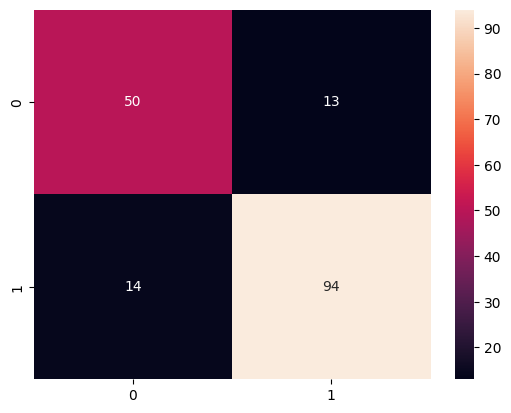

In [17]:
classes_names = ['0','1']
cm = pd.DataFrame(
    confusion_matrix(yTest, mlpcClf.predict(xTestTransf)), 
    columns=classes_names, 
    index=classes_names
)
                  
sns.heatmap(cm, annot=True, fmt='d')
plt.show()